# Bibliotecas

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Teste Qui-Quadrado
from scipy.stats import chi2_contingency

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# __Base de dados__

A base de dados utilizada nesse notebook foi retirada do [kaggle](https://www.kaggle.com/) em 12-09-2022.

_Link para a base de dados original:_
[Wrestling World Tournament](https://www.kaggle.com/datasets/julienjta/wrestling-world-tournament)

In [2]:
df = pd.read_csv('./dataset/data.csv')

In [3]:
df

,Unnamed: 0,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Willie Durham,Male,34,185.5,France,104,Judo,2,9,6,5,Consejo Global de Lucha Libre,2008,353
496,496,Winnie Larsen,Female,31,161.5,France,71,"Judo, Karate, Kick-Boxing, MMA",5,4,9,6,World Wrestling Entertainment,2003,74
497,497,Winston Wahl,Male,22,188.5,France,102,Kick-Boxing,3,8,8,7,Consejo Global de Lucha Libre,2021,265
498,498,Yolanda Yamashiro,Female,32,177.0,France,92,Judo,2,5,5,5,Consejo Global de Lucha Libre,2012,499


A base acima conta com diferentes informações de 500 lutadores de 3 diferentes federações que competiram em lutas de 1 contra 1. A saber, as informações disponíveis são:

1. Nome 
2. Gênero
3. Idade
4. Altura
5. Nacionalidade
6. Peso
7. Arte marcial praticada
8. Número de horas diárias gastas em treino
9. Escore de força
10. Escore de agilidade
11. Escore de capaciedade mental
12. Federação
13. Ano de início no esporte
14. Ranking final na competição

## __O problema__

Queremos analisar a base de dados a fim de entender se as diferentes características de cada lutador podem indicar uma posição maior ou menor no ranking final.

Para solucionar esse problema, seria possível analisar cada uma das variáveis isoladamente e _observar como o comportamento delas pode mudar a depender do ranking_. Buscando automatizar esse processo e obter resultados mais confiáveis, podemos utilizar um teste estatístico para comparar as variáveis categóricas: o __teste qui-quadrado__.

## __Explorando a Base__

Uma boa forma de entendermos o comportamento das variáveis de nossa base de dados é com a utilização de histogramas.

É possível realizar o plot do histograma de cada variável pela biblioteca pandas

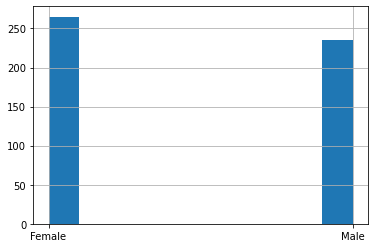

In [4]:
df.gender.hist();

Contudo, para termos uma visão geral da base, podemos utilizar um `for loop` para plotar o histograma de todas as variáveis de interesse

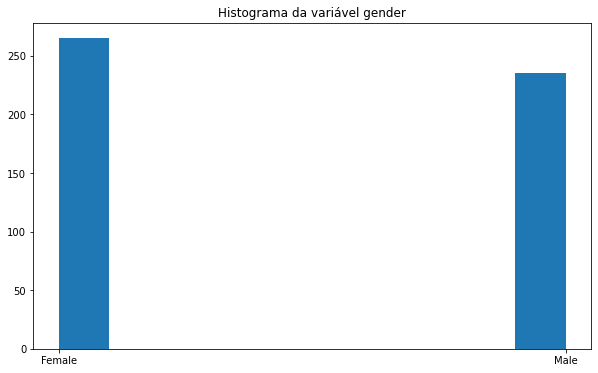

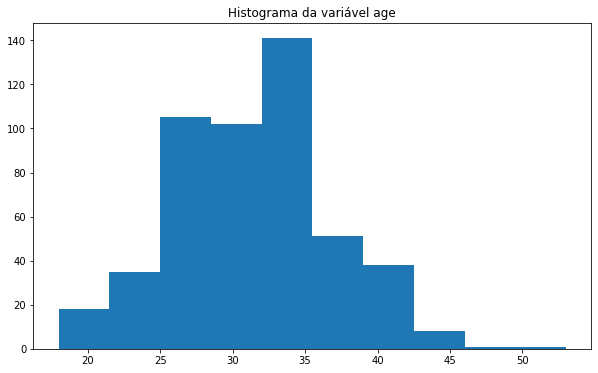

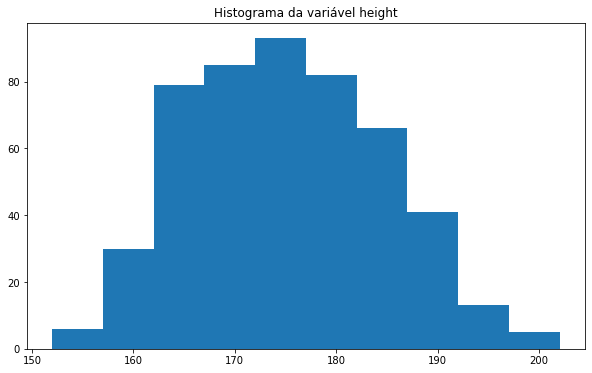

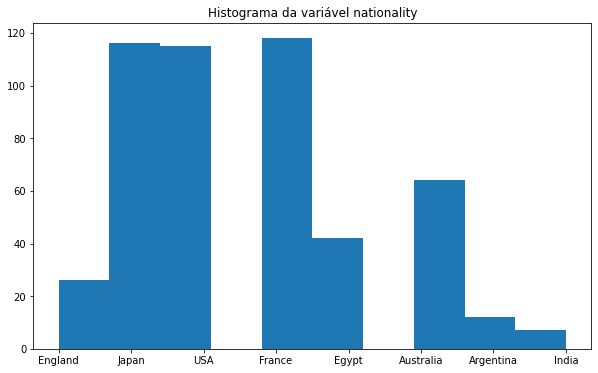

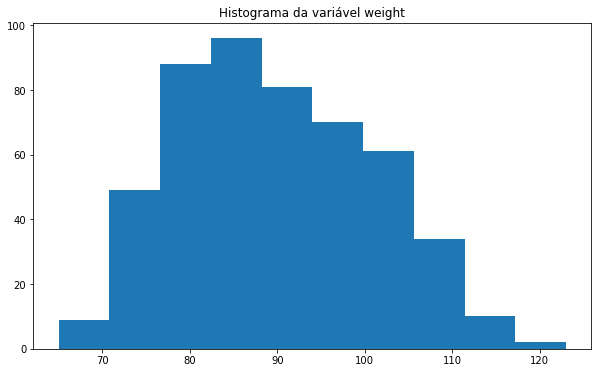

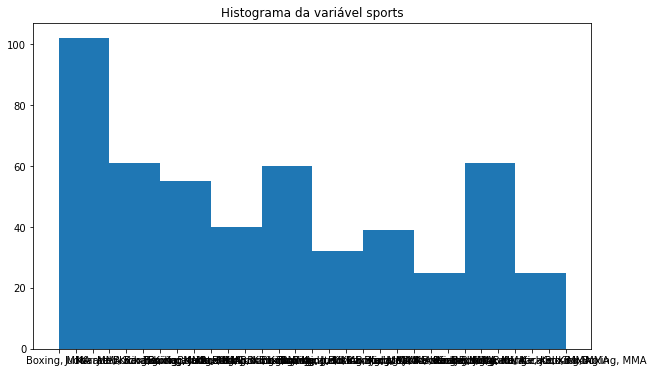

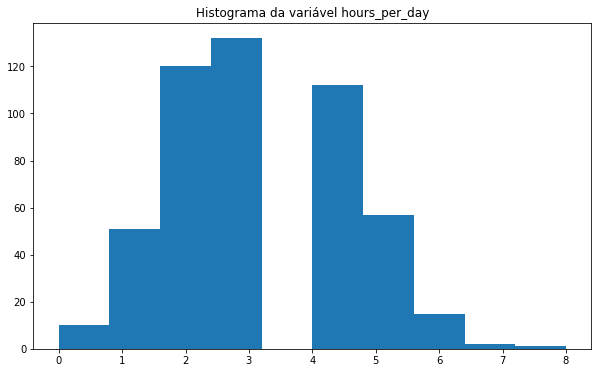

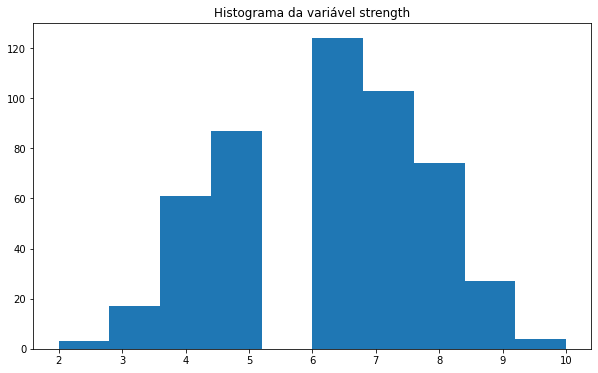

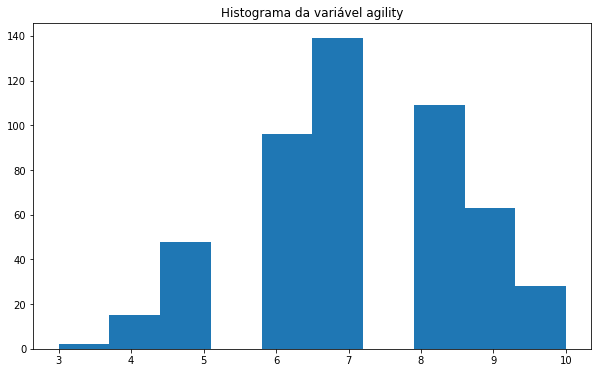

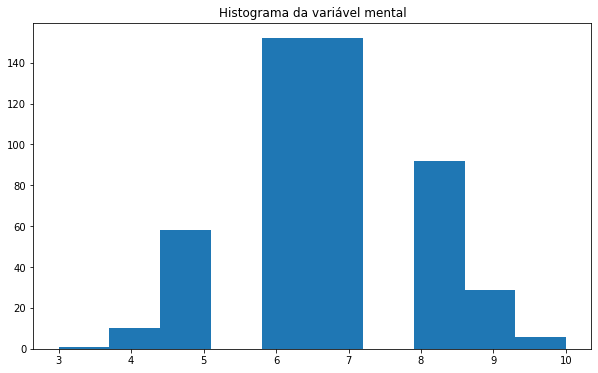

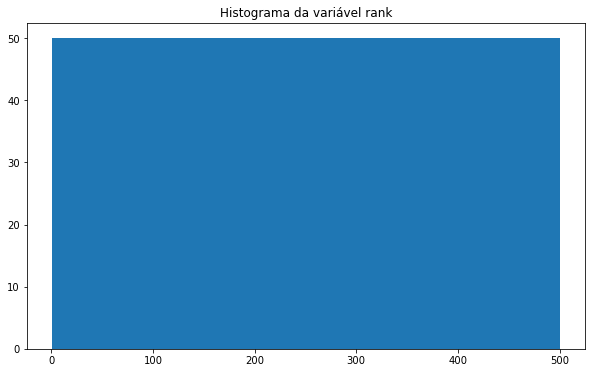

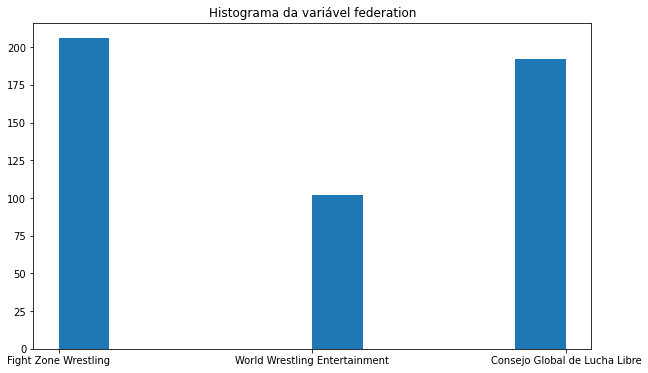

In [5]:
var = ['gender', 'age', 'height', 'nationality', 'weight', 'sports', 'hours_per_day', 'strength', 'agility', 'mental', 'rank', 'federation']

for i in var:
    plt.figure(figsize = (10, 6))
    plt.hist(df[i]);
    plt.title(f'Histograma da variável {i}')
    plt.show()

A partir dos histogramas, podemos observar algumas características das variáveis obtidas:

1. Variáveis categóricas: gender, nationality, sports, federation
2. Variáveis numéricas: age, height, weight, hours per day, strength, agility, mental

Para comparar as variáveis numéricas com a variável `rank`, será necessário agrupá-las em intervalos para ser possível analisá-las em conjunto.
Ademais, como a variável `sports` possui diversas opções combinadas, será necessário separar cada uma das variáveis em uma coluna.

### Criando variáveis categóricas

#### Sports

In [6]:
df.sports = df.sports.str.replace(' ', '') # retirar espaçamento entre sports
df.sports.str.get_dummies(sep = ',') # criar variáveis dummies para cada esporte

,Boxing,Judo,Karate,Kick-Boxing,MMA
0,1,0,0,0,1
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
495,0,1,0,0,0
496,0,1,1,1,1
497,0,0,0,1,0
498,0,1,0,0,0


In [7]:
df = pd.concat([df, df.sports.str.get_dummies(sep = ',')], axis = 1) # adicionar a tabela gerada anteriormente ao dataframe

# substituir 1 e 0 por yes e no
for i in ['Boxing', 'Judo', 'Karate', 'Kick-Boxing', 'MMA']:
    df[i] = np.where(df[i] == 1, 'Yes', 'No')

df.drop(columns = 'sports', inplace = True) # remover a coluna de sports

In [8]:
df

,Unnamed: 0,name,gender,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Boxing,Judo,Karate,Kick-Boxing,MMA
0,0,Aaron Peavy,Female,41,165.0,England,82,3,7,8,7,Fight Zone Wrestling,1989,42,Yes,No,No,No,Yes
1,1,Abe Rutland,Male,36,185.0,Japan,100,0,8,5,9,World Wrestling Entertainment,2006,161,No,Yes,No,No,No
2,2,Adrian Quinn,Male,29,178.5,Japan,93,4,8,8,7,World Wrestling Entertainment,2012,153,No,No,Yes,No,No
3,3,Alan Beckham,Male,39,187.5,Japan,107,3,7,6,8,Fight Zone Wrestling,2003,252,No,Yes,No,No,No
4,4,Albertha Rodriguez,Female,29,158.0,USA,72,1,5,7,7,Consejo Global de Lucha Libre,2012,360,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Willie Durham,Male,34,185.5,France,104,2,9,6,5,Consejo Global de Lucha Libre,2008,353,No,Yes,No,No,No
496,496,Winnie Larsen,Female,31,161.5,France,71,5,4,9,6,World Wrestling Entertainment,2003,74,No,Yes,Yes,Yes,Yes
497,497,Winston Wahl,Male,22,188.5,France,102,3,8,8,7,Consejo Global de Lucha Libre,2021,265,No,No,No,Yes,No
498,498,Yolanda Yamashiro,Female,32,177.0,France,92,2,5,5,5,Consejo Global de Lucha Libre,2012,499,No,Yes,No,No,No


#### Age, height, weight, hours_per_day, strenght, agility, mental, rank

In [9]:
df['age_cat'] = pd.cut(df.age, bins = [18, 25, 28, 30, 33, 35, 60], labels = ['18-25', '26-28', '29-30', '31-33', '34-35', '36-60'], include_lowest = True)
df['height_cat'] = pd.cut(df.height, bins = [150, 165, 170, 175, 180, 185, 205], labels = ['150-165', '166-170', '171-175', '176-180', '181-185', '186-205'], include_lowest = True)
df['weight_cat'] = pd.cut(df.weight, bins = [65, 80, 85, 90, 95, 100, 125], labels = ['65-80', '81-85', '86-90', '91-95', '96-100', '101-125'], include_lowest = True)
df['hours_per_day_cat'] = pd.cut(df.hours_per_day, bins = [0, 2, 4, 8], labels = ['0-2', '3-4', '5-8'], include_lowest = True)
df['strength_cat'] = pd.cut(df.strength, bins = [0, 4, 6, 10], labels = ['0-4', '5-6', '7-10'], include_lowest = True)
df['agility_cat'] = pd.cut(df.agility, bins = [0, 4, 6, 10], labels = ['0-4', '5-6', '7-10'], include_lowest = True)
df['mental_cat'] = pd.cut(df.mental, bins = [0, 4, 6, 10], labels = ['0-4', '5-6', '7-10'], include_lowest = True)
df['rank_cat'] = np.where(df['rank'] <= 100, '0-100',
                         np.where(df['rank'] <= 200, '101-200',
                                 np.where(df['rank'] <= 300, '201-300',
                                         np.where(df['rank'] <= 400, '301-400', '401-500'))))

# __Teste Qui-Quadrado__

Para realizar o teste Qui-Quadrado, precisamos escolher as variáveis que iremos testar.

In [10]:
df.columns

Index(['Unnamed: 0', 'name', 'gender', 'age', 'height', 'nationality',
       'weight', 'hours_per_day', 'strength', 'agility', 'mental',
       'federation', 'year_start', 'rank', 'Boxing', 'Judo', 'Karate',
       'Kick-Boxing', 'MMA', 'age_cat', 'height_cat', 'weight_cat',
       'hours_per_day_cat', 'strength_cat', 'agility_cat', 'mental_cat',
       'rank_cat'],
      dtype='object')

In [11]:
var1 = 'rank_cat'
var2 = 'gender'

Para realizar o teste Qui-Quadrado, é necessário construir uma tabela em que todos os valores da variável 1 sejam linhas e que todos os valores da variável 2 sejam colunas.

Assim, cada célula $a_{ij}$, representará a ocorrência de observações com o valor $i$ para a variável 1 e o valor $j$ para a variável 2.

In [12]:
chi = pd.crosstab(df[var1], df[var2])
chi

gender,Female,Male
rank_cat,,
0-100,37,63
101-200,41,59
201-300,49,51
301-400,61,39
401-500,77,23


Com essa tabela, é possível calcular o teste Qui-Quadrado com a função `chi2_contingency` do pacote `scipy.stats`.

In [13]:
chi_scores = chi2_contingency(chi)
chi_scores

(42.39261340826977,
 1.3830620946286188e-08,
 4,
 array([[53., 47.],
        [53., 47.],
        [53., 47.],
        [53., 47.],
        [53., 47.]]))

O primeiro valor da tupla resultando indica o valor do teste:

In [14]:
scores = pd.Series(chi_scores[0])
scores

0    42.392613
dtype: float64

Já o segundo valor, representa o p-valor:

In [15]:
pvalues = pd.Series(chi_scores[1])
pvalues

0    1.383062e-08
dtype: float64

## __Criando uma função__

Para generalizar o trabalho que foi feito, podemos criar uma função que execute os mesmos passos para qualquer conjunto de dados.

In [16]:
def qui_quadrado(df, var1, var2):

  chi = pd.crosstab(df[var1], df[var2])
  chi_scores = chi2_contingency(chi)

  scores = pd.Series(chi_scores[0])
  pvalues = pd.Series(chi_scores[1])

  d = {'Qui2': scores, 'p-Valor': pvalues}
  chi_squared = pd.DataFrame(d)

  # Renomear
  d = {0: var2}
  chi_squared = chi_squared.rename(d)

  return chi_squared

In [17]:
qui_quadrado(df, var1, var2)

,Qui2,p-Valor
gender,42.392613,1.383062e-08


# Utilizando um loop para automatizar o teste

Ao utilizarmos uma estrutura de repetição, é possível generalizar a função anterior para que seja possível passar uma lista de variáveis a serem testadas.

Como um bônus, também iremos reordenar a tabela exibida para que os menores p-valores apareçam primeiro.

In [18]:
def qui_quadrado(df, variavel, lista):

  # Calcular Qui2 e p-valor para cada variável e colocar resultado num df
  d = {'Qui2': [], 'p-Valor': []}

  for l in lista:
      
      # Cria tabela que relaciona variável com Tipo de Consumidor
      tab = pd.crosstab(df[variavel], df[l])

      # Calcula o qui2 entre as duas variáveis
      chi_scores = chi2_contingency(tab)

      # Recupera o valor e p-value do teste
      scores = pd.Series(chi_scores[0])
      pvalues = pd.Series(chi_scores[1])

      # Adiciona resultado ao dicionário
      d['Qui2'].append(scores[0])
      d['p-Valor'].append(pvalues[0])

  # Transformar dicionário em dataframe
  chi_squared = pd.DataFrame(d)

  # Formato de visualização dos números
  pd.options.display.float_format = "{:,.2f}".format

  # Renomear linhas do df
  for n, l in zip(np.arange(0, len(lista), 1), lista[0:len(lista)]):
    chi_squared = chi_squared.rename(index = {n: l})

  # Mostrar em ordem crescente para o p-valor
  chi_squared = chi_squared.sort_values(by = 'p-Valor', ascending = True)

  # Visualizar df
  return chi_squared

## Aplicando a função nas variáveis

In [19]:
var = ['gender', 'nationality', 'federation', 'Boxing', 'Judo', 'Karate', 'Kick-Boxing', 'MMA', 'age_cat', 'height_cat',
       'weight_cat', 'hours_per_day_cat', 'strength_cat', 'agility_cat', 'mental_cat']

In [20]:
qui_quadrado(df, 'rank_cat', var)

,Qui2,p-Valor
MMA,176.77,0.00
hours_per_day_cat,117.13,0.00
strength_cat,80.90,0.00
mental_cat,56.37,0.00
gender,42.39,0.00
Kick-Boxing,32.48,0.00
agility_cat,39.62,0.00
weight_cat,51.41,0.00
Boxing,16.76,0.00
height_cat,42.00,0.00


Portanto, partindo de um _benchmark_ de 0.05 para o p-Valor, as variáveis `MMA`, `hours_per_day`, `strenght`, `mental`, `gender`, `Kick-Boxing`, `agility`, `weight`, `Boxing`, `height`, e `age` estão relacionadas com o _ranking_ final obtido.

## Mostrando graficamente a relação entre as variáveis

### Funções

In [21]:
def analise_bi(df, var1, var2, ordem_linhas, ordem_colunas):
    
    df_group = df.groupby([var1, var2])[var2].count().unstack(var2).fillna(0)

    df_group = df_group.reindex(ordem_linhas)

    # Reordenar colunas
    df_group = df_group[ordem_colunas]

    return df_group

In [22]:
def barras_empilhadas_porcentagem(df_group, titulo, barWidth = 0.75):
    
    if len(df_group.columns) == 2:
        
        total = [ i+j for i, j in zip(df_group.iloc[:,0], df_group.iloc[:,1])]
        bar1 = [ i / j * 100 for i, j in zip(df_group.iloc[:,0], total)]
        bar2 = [ i / j * 100 for i, j in zip(df_group.iloc[:,1], total)]

        r = df_group.index

        # Barra 1
        plt.bar(r, bar1, color = '#F54337', edgecolor = 'white', width = barWidth, label = df_group.columns[0])
        # Barra 2
        plt.bar(r, bar2, bottom = bar1, color = '#446BC4', edgecolor = 'white', width = barWidth, label = df_group.columns[1])

    
    elif len(df_group.columns) == 3:
        
        total = [ i+j+k for i, j, k in zip(df_group.iloc[:,0], df_group.iloc[:,1], df_group.iloc[:,2])]
        bar1 = [ i / j * 100 for i, j in zip(df_group.iloc[:,0], total)]
        bar2 = [ i / j * 100 for i, j in zip(df_group.iloc[:,1], total)]
        bar3 = [ i / j * 100 for i, j in zip(df_group.iloc[:,2], total)]

        r = df_group.index

        # Barra 1
        plt.bar(r, bar1, color = '#FFCC00', edgecolor = 'white', width = barWidth, label = df_group.columns[0])
        # Barra 2
        plt.bar(r, bar2, bottom = bar1, color = '#F39000', edgecolor = 'white', width = barWidth, label = df_group.columns[1])
        # Barra 3
        plt.bar(r, bar3, bottom = [i+j for i, j in zip(bar1, bar2)], color = '#F54337', edgecolor = 'white', width = barWidth, label = df_group.columns[2])
           
    elif len(df_group.columns) == 4:
        
        total = [ i+j+k+l for i, j, k, l in zip(df_group.iloc[:,0], df_group.iloc[:,1], df_group.iloc[:,2], df_group.iloc[:,3])]
        bar1 = [ i / j * 100 for i, j in zip(df_group.iloc[:,0], total)]
        bar2 = [ i / j * 100 for i, j in zip(df_group.iloc[:,1], total)]
        bar3 = [ i / j * 100 for i, j in zip(df_group.iloc[:,2], total)]
        bar4 = [ i / j * 100 for i, j in zip(df_group.iloc[:,3], total)]

        r = df_group.index

        # Barra 1
        plt.bar(r, bar1, color = '#FFCC00', edgecolor = 'white', width = barWidth, label = df_group.columns[0])
        # Barra 2
        plt.bar(r, bar2, bottom = bar1, color = '#F39000', edgecolor = 'white', width = barWidth, label = df_group.columns[1])
        # Barra 3
        plt.bar(r, bar3, bottom = [i+j for i, j in zip(bar1, bar2)], color = '#F54337', edgecolor = 'white', width = barWidth, label = df_group.columns[2])
        # Barra 4
        plt.bar(r, bar4, bottom = [i+j+k for i, j, k in zip(bar1, bar2, bar3)], color = '#8C0046', edgecolor = 'white', width = barWidth, label = df_group.columns[3])
    
    elif len(df_group.columns) == 5:
        
        total = [ i+j+k+l+m for i, j, k, l, m in zip(df_group.iloc[:,0], df_group.iloc[:,1], df_group.iloc[:,2], df_group.iloc[:,3], df_group.iloc[:,4])]
        bar1 = [ i / j * 100 for i, j in zip(df_group.iloc[:,0], total)]
        bar2 = [ i / j * 100 for i, j in zip(df_group.iloc[:,1], total)]
        bar3 = [ i / j * 100 for i, j in zip(df_group.iloc[:,2], total)]
        bar4 = [ i / j * 100 for i, j in zip(df_group.iloc[:,3], total)]
        bar5 = [ i / j * 100 for i, j in zip(df_group.iloc[:,4], total)]

        r = df_group.index

        # Barra 1
        plt.bar(r, bar1, color = '#FFCC00', edgecolor = 'white', width = barWidth, label = df_group.columns[0])
        # Barra 2
        plt.bar(r, bar2, bottom = bar1, color = '#F39000', edgecolor = 'white', width = barWidth, label = df_group.columns[1])
        # Barra 3
        plt.bar(r, bar3, bottom = [i+j for i, j in zip(bar1, bar2)], color = '#F54337', edgecolor = 'white', width = barWidth, label = df_group.columns[2])
        # Barra 4
        plt.bar(r, bar4, bottom = [i+j+k for i, j, k in zip(bar1, bar2, bar3)], color = '#8C0046', edgecolor = 'white', width = barWidth, label = df_group.columns[3])
        # Barra 5
        plt.bar(r, bar5, bottom = [i+j+k+l for i, j, k, l in zip(bar1, bar2, bar3, bar4)], color = '#446BC4', edgecolor = 'white', width = barWidth, label = df_group.columns[4])
            
    elif len(df_group.columns) == 6:

        total = [ i+j+k+l+m+n for i, j, k, l, m, n in zip(df_group.iloc[:,0], df_group.iloc[:,1], df_group.iloc[:,2], df_group.iloc[:,3], df_group.iloc[:,4], df_group.iloc[:,5])]
        bar1 = [ i / j * 100 for i, j in zip(df_group.iloc[:,0], total)]
        bar2 = [ i / j * 100 for i, j in zip(df_group.iloc[:,1], total)]
        bar3 = [ i / j * 100 for i, j in zip(df_group.iloc[:,2], total)]
        bar4 = [ i / j * 100 for i, j in zip(df_group.iloc[:,3], total)]
        bar5 = [ i / j * 100 for i, j in zip(df_group.iloc[:,4], total)]
        bar6 = [ i / j * 100 for i, j in zip(df_group.iloc[:,5], total)]

        r = df_group.index

        # Barra 1
        plt.bar(r, bar1, color = '#FFCC00', edgecolor = 'white', width = barWidth, label = df_group.columns[0])
        # Barra 2
        plt.bar(r, bar2, bottom = bar1, color = '#F39000', edgecolor = 'white', width = barWidth, label = df_group.columns[1])
        # Barra 3
        plt.bar(r, bar3, bottom = [i+j for i, j in zip(bar1, bar2)], color = '#F54337', edgecolor = 'white', width = barWidth, label = df_group.columns[2])
        # Barra 4
        plt.bar(r, bar4, bottom = [i+j+k for i, j, k in zip(bar1, bar2, bar3)], color = '#8C0046', edgecolor = 'white', width = barWidth, label = df_group.columns[3])
        # Barra 5
        plt.bar(r, bar5, bottom = [i+j+k+l for i, j, k, l in zip(bar1, bar2, bar3, bar4)], color = '#446BC4', edgecolor = 'white', width = barWidth, label = df_group.columns[4])
        # Barra 6
        plt.bar(r, bar6, bottom = [i+j+k+l+m for i, j, k, l, m in zip(bar1, bar2, bar3, bar4, bar5)], color = '#009EBF', edgecolor = 'white', width = barWidth, label = df_group.columns[5])

    elif len(df_group.columns) == 7:

        total = [ i+j+k+l+m+n+o for i, j, k, l, m, n, o in zip(df_group.iloc[:,0], df_group.iloc[:,1], df_group.iloc[:,2], df_group.iloc[:,3], df_group.iloc[:,4], df_group.iloc[:,5], df_group.iloc[:,6])]
        bar1 = [ i / j * 100 for i, j in zip(df_group.iloc[:,0], total)]
        bar2 = [ i / j * 100 for i, j in zip(df_group.iloc[:,1], total)]
        bar3 = [ i / j * 100 for i, j in zip(df_group.iloc[:,2], total)]
        bar4 = [ i / j * 100 for i, j in zip(df_group.iloc[:,3], total)]
        bar5 = [ i / j * 100 for i, j in zip(df_group.iloc[:,4], total)]
        bar6 = [ i / j * 100 for i, j in zip(df_group.iloc[:,5], total)]
        bar7 = [ i / j * 100 for i, j in zip(df_group.iloc[:,6], total)]

        r = df_group.index

        # Barra 1
        plt.bar(r, bar1, color = '#FFCC00', edgecolor = 'white', width = barWidth, label = df_group.columns[0])
        # Barra 2
        plt.bar(r, bar2, bottom = bar1, color = '#F39000', edgecolor = 'white', width = barWidth, label = df_group.columns[1])
        # Barra 3
        plt.bar(r, bar3, bottom = [i+j for i, j in zip(bar1, bar2)], color = '#F54337', edgecolor = 'white', width = barWidth, label = df_group.columns[2])
        # Barra 4
        plt.bar(r, bar4, bottom = [i+j+k for i, j, k in zip(bar1, bar2, bar3)], color = '#8C0046', edgecolor = 'white', width = barWidth, label = df_group.columns[3])
        # Barra 5
        plt.bar(r, bar5, bottom = [i+j+k+l for i, j, k, l in zip(bar1, bar2, bar3, bar4)], color = '#446BC4', edgecolor = 'white', width = barWidth, label = df_group.columns[4])
        # Barra 6
        plt.bar(r, bar6, bottom = [i+j+k+l+m for i, j, k, l, m in zip(bar1, bar2, bar3, bar4, bar5)], color = '#009EBF', edgecolor = 'white', width = barWidth, label = df_group.columns[5])
        # Barra 7
        plt.bar(r, bar7, bottom = [i+j+k+l+m+n for i, j, k, l, m, n in zip(bar1, bar2, bar3, bar4, bar5, bar6)], color = '#2FD07B', edgecolor = 'white', width = barWidth, label = df_group.columns[6])
        
    else:
        return print('Número de categorias inválido')
    
    # Linha horizontal
    plt.axhline(linewidth = 2, color = 'black')

    # Adicionar titulo
    plt.title(titulo, fontsize = 16, pad = 20);

    # Adicionar legenda
    plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.17), ncol = 3, frameon = False)

    # Remover eixo y
    plt.yticks([])

    # Remover ticks
    plt.tick_params(left = False)
    plt.tick_params(bottom = False)

    # Alterar tamanho e salvar gráfico
    fig = plt.gcf()
    fig.set_size_inches(13, 8)

    # Mostrar gráfico
    plt.show()

### Relação entre variáveis

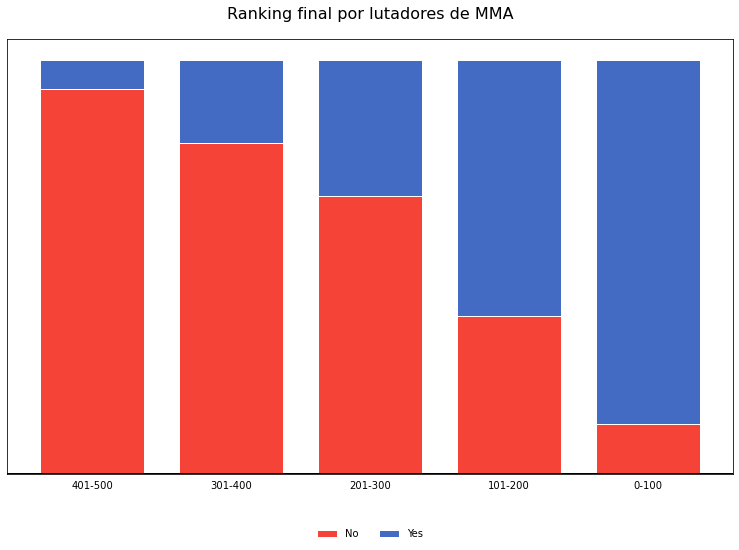

In [23]:
var1 = 'rank_cat'
var2 = 'MMA'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['No',
                 'Yes']

rank_MMA = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por lutadores de MMA'

barras_empilhadas_porcentagem(rank_MMA, titulo)

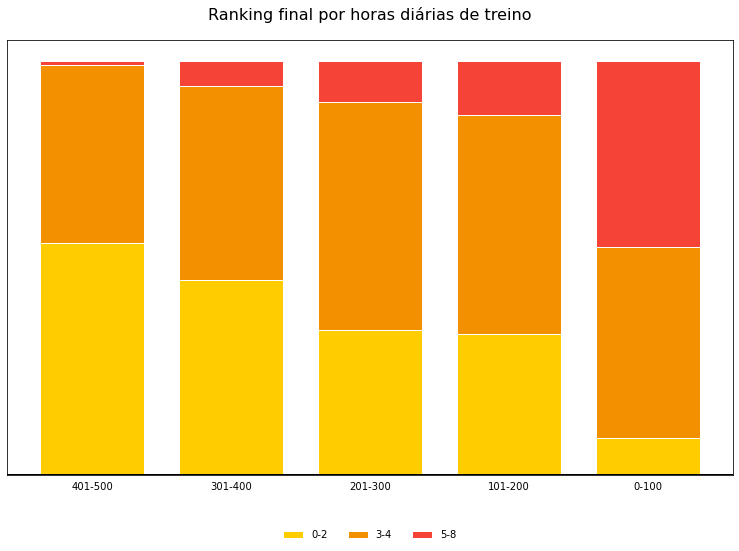

In [24]:
var1 = 'rank_cat'
var2 = 'hours_per_day_cat'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['0-2',
                 '3-4',
                 '5-8']

rank_hours = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por horas diárias de treino'

barras_empilhadas_porcentagem(rank_hours, titulo)

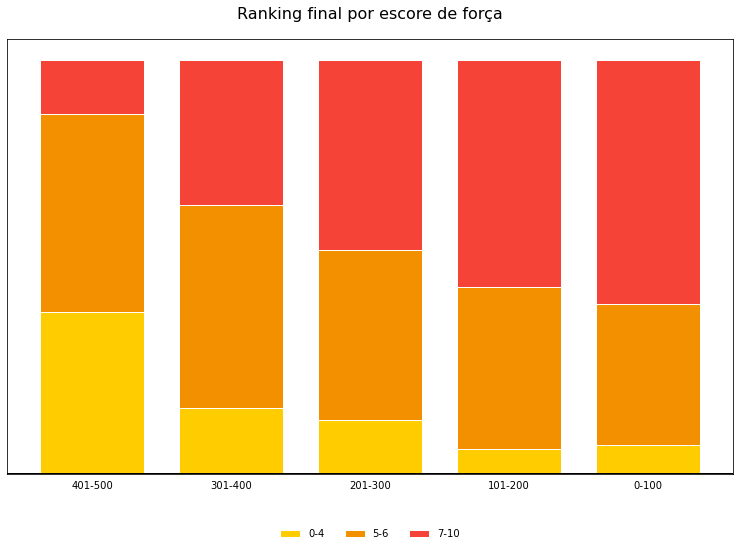

In [25]:
var1 = 'rank_cat'
var2 = 'strength_cat'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['0-4',
                 '5-6',
                 '7-10']

rank_strength = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por escore de força'

barras_empilhadas_porcentagem(rank_strength, titulo)

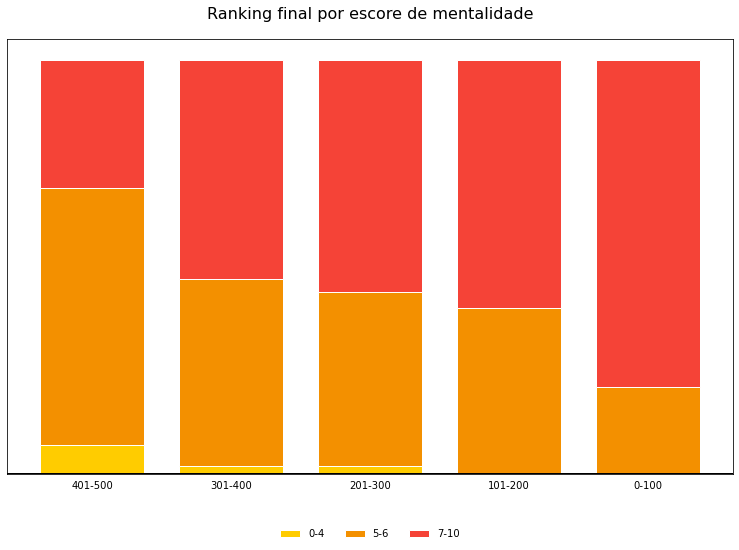

In [26]:
var1 = 'rank_cat'
var2 = 'mental_cat'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['0-4',
                 '5-6',
                 '7-10']

rank_mental = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por escore de mentalidade'

barras_empilhadas_porcentagem(rank_mental, titulo)

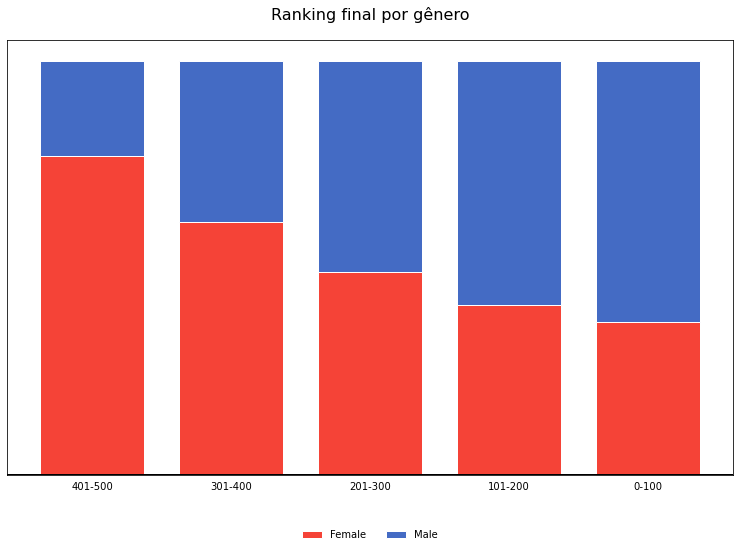

In [27]:
var1 = 'rank_cat'
var2 = 'gender'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['Female',
                 'Male']

rank_gender = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por gênero'

barras_empilhadas_porcentagem(rank_gender, titulo)

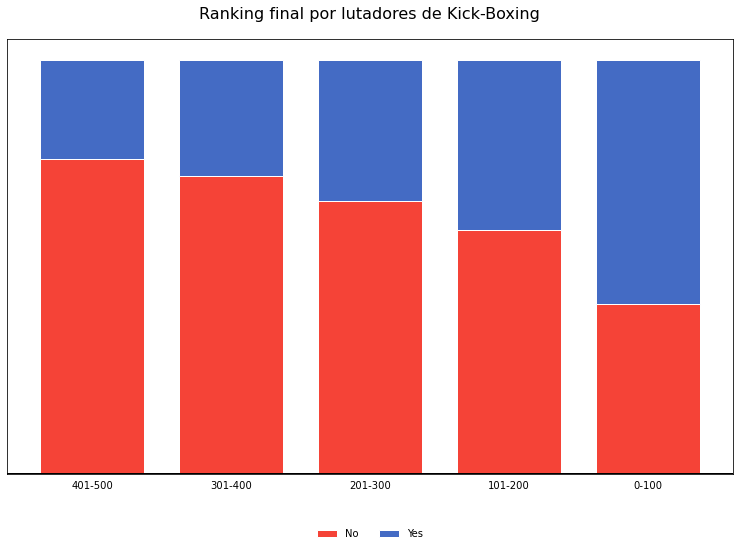

In [28]:
var1 = 'rank_cat'
var2 = 'Kick-Boxing'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['No',
                 'Yes']

rank_kickboxing = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por lutadores de Kick-Boxing'

barras_empilhadas_porcentagem(rank_kickboxing, titulo)

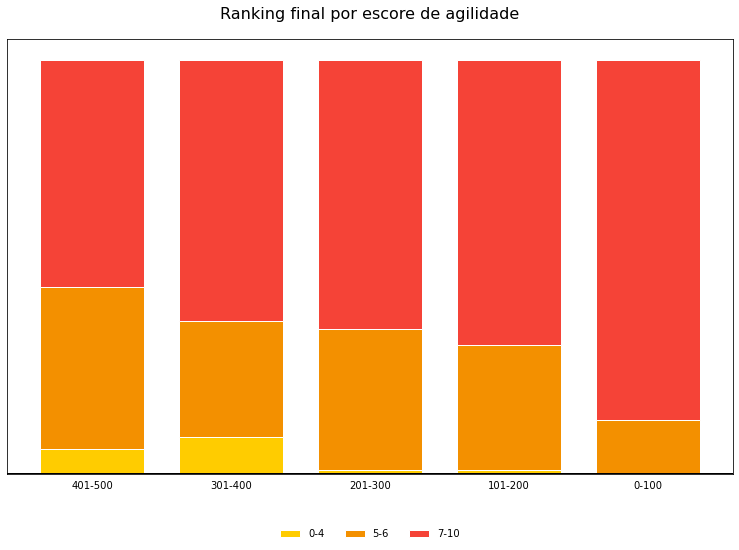

In [29]:
var1 = 'rank_cat'
var2 = 'agility_cat'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['0-4',
                 '5-6',
                 '7-10']

rank_agility = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por escore de agilidade'

barras_empilhadas_porcentagem(rank_agility, titulo)

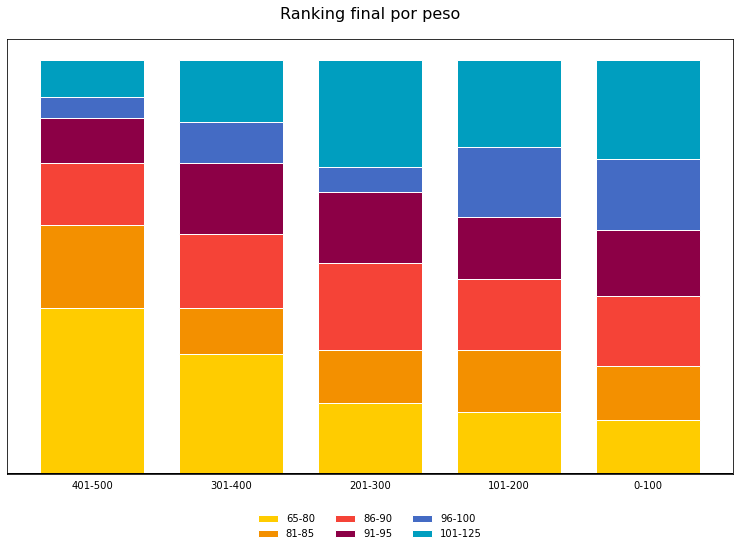

In [30]:
var1 = 'rank_cat'
var2 = 'weight_cat'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['65-80',
                 '81-85',
                 '86-90',
                 '91-95',
                 '96-100',
                 '101-125']

rank_weight = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por peso'

barras_empilhadas_porcentagem(rank_weight, titulo)

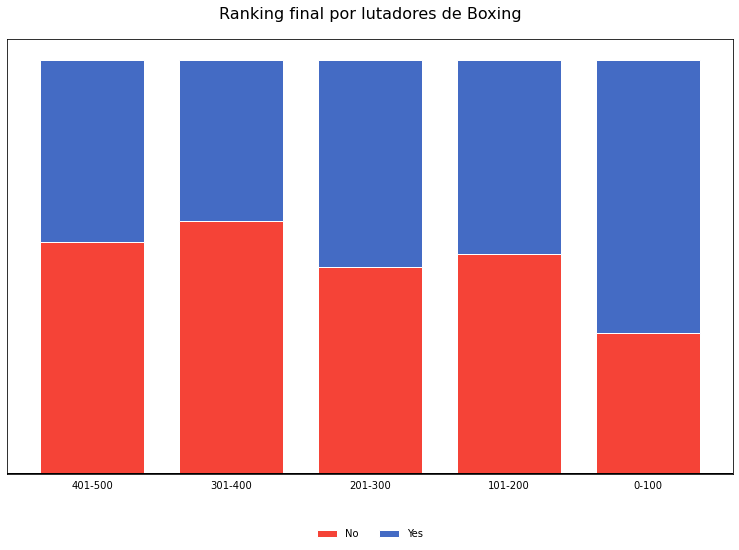

In [31]:
var1 = 'rank_cat'
var2 = 'Boxing'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['No',
                 'Yes']

rank_boxing = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por lutadores de Boxing'

barras_empilhadas_porcentagem(rank_boxing, titulo)

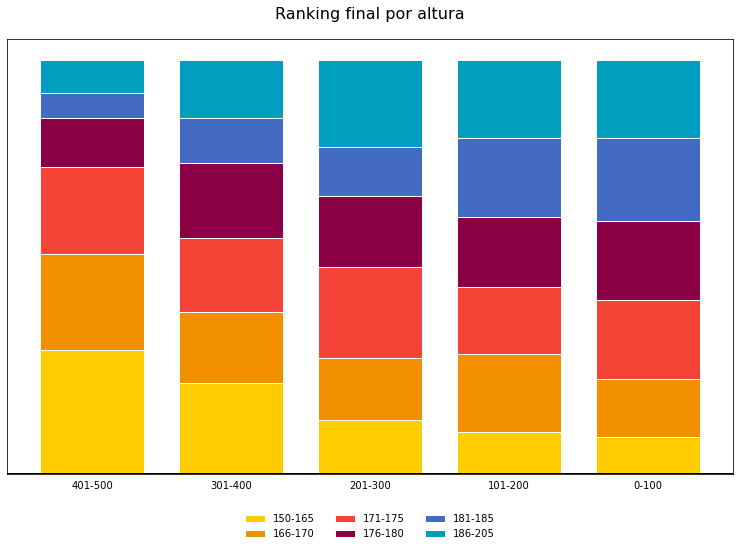

In [32]:
var1 = 'rank_cat'
var2 = 'height_cat'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['150-165',
                 '166-170',
                 '171-175',
                 '176-180',
                 '181-185',
                 '186-205']

rank_height = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por altura'

barras_empilhadas_porcentagem(rank_height, titulo)

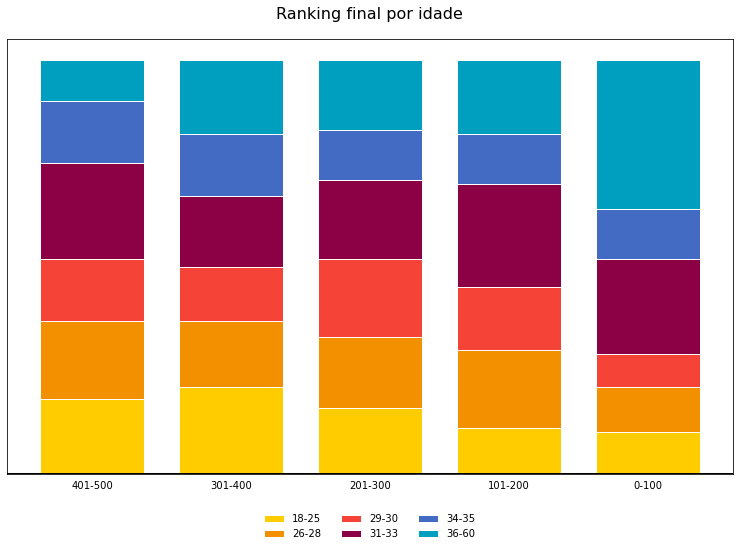

In [33]:
var1 = 'rank_cat'
var2 = 'age_cat'

ordem_linhas = ['401-500',
                '301-400',
                '201-300',
                '101-200',
                '0-100']

ordem_colunas = ['18-25',
                 '26-28',
                 '29-30',
                 '31-33',
                 '34-35',
                 '36-60']

rank_age = analise_bi(df, var1, var2, ordem_linhas, ordem_colunas)
titulo = 'Ranking final por idade'

barras_empilhadas_porcentagem(rank_age, titulo)